In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [24]:
dataset_train = pd.read_csv('./data/fashion-mnist_train.csv')
dataset_test = pd.read_csv('./data/fashion-mnist_test.csv')

X =  dataset_train.iloc[:,1:]
Y = dataset_train.iloc[:,0]

dataset_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
Y.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [25]:
class_labels_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
# dataset_train['label_name'] = dataset_train['label'].map(class_labels_mapping)
labels = pd.DataFrame(dataset_train['label'])

In [26]:
KNN_CONFIG = {
    "leaf_size": 20,
    "metric": 'minkowski',
    "neighbors": 10,
    "p": 2,
    "weights": "uniform"
}

In [44]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
kf = KFold(n_splits=5)
accuracy = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    scaler = StandardScaler()

    # Print relevant information for debugging
    print(f"Fold {i}: Train indices: {train_index}, Test indices: {test_index}")

    # Scale Sets
    X_train_scaled = scaler.fit_transform(X.iloc[train_index])
    X_test_scaled = scaler.transform(X.iloc[test_index])

    # Normalized Sets
    X_train_normalized = normalize(X_train_scaled)
    X_test_normalized = normalize(X_test_scaled)

    # KNN
    neigh = KNeighborsClassifier(
        leaf_size=KNN_CONFIG["leaf_size"],
        metric=KNN_CONFIG["metric"],
        n_neighbors=KNN_CONFIG["neighbors"],
        p=KNN_CONFIG["p"],
        weights=KNN_CONFIG["weights"],
        n_jobs=-1
    )

    neigh.fit(X_train_normalized, Y.iloc[train_index])

    score = neigh.score(X_test_normalized, Y.iloc[test_index])
    print(f"[ Fold {i} ]: Score = {score}")

    # Accuracy calculation
    accuracy.append(score)

Fold 0: Train indices: [12000 12001 12002 ... 59997 59998 59999], Test indices: [    0     1     2 ... 11997 11998 11999]
[ Fold 0 ]: Score = 0.8634166666666667
Fold 1: Train indices: [    0     1     2 ... 59997 59998 59999], Test indices: [12000 12001 12002 ... 23997 23998 23999]
[ Fold 1 ]: Score = 0.86475
Fold 2: Train indices: [    0     1     2 ... 59997 59998 59999], Test indices: [24000 24001 24002 ... 35997 35998 35999]
[ Fold 2 ]: Score = 0.8625
Fold 3: Train indices: [    0     1     2 ... 59997 59998 59999], Test indices: [36000 36001 36002 ... 47997 47998 47999]
[ Fold 3 ]: Score = 0.8575833333333334
Fold 4: Train indices: [    0     1     2 ... 47997 47998 47999], Test indices: [48000 48001 48002 ... 59997 59998 59999]
[ Fold 4 ]: Score = 0.8603333333333333


## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

In [23]:
tree = DecisionTreeClassifier(criterion='gini',random_state=10)
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.7935

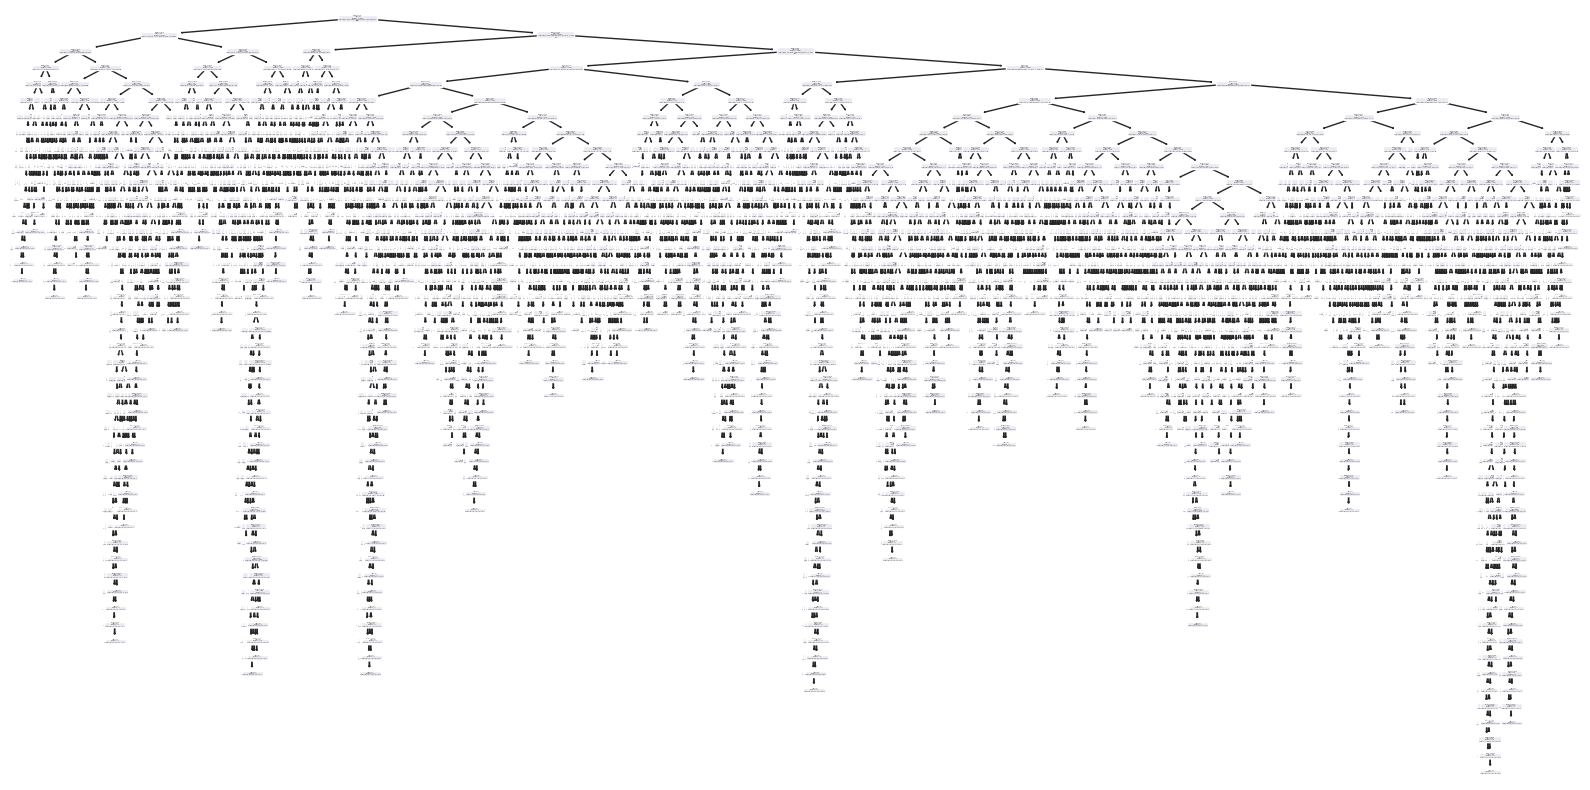

In [17]:
from helpers import plot_decision_tree

plot_decision_tree(tree=tree)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

forest = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)

forest.fit(x_train, y_train)

predictions = forest.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8835


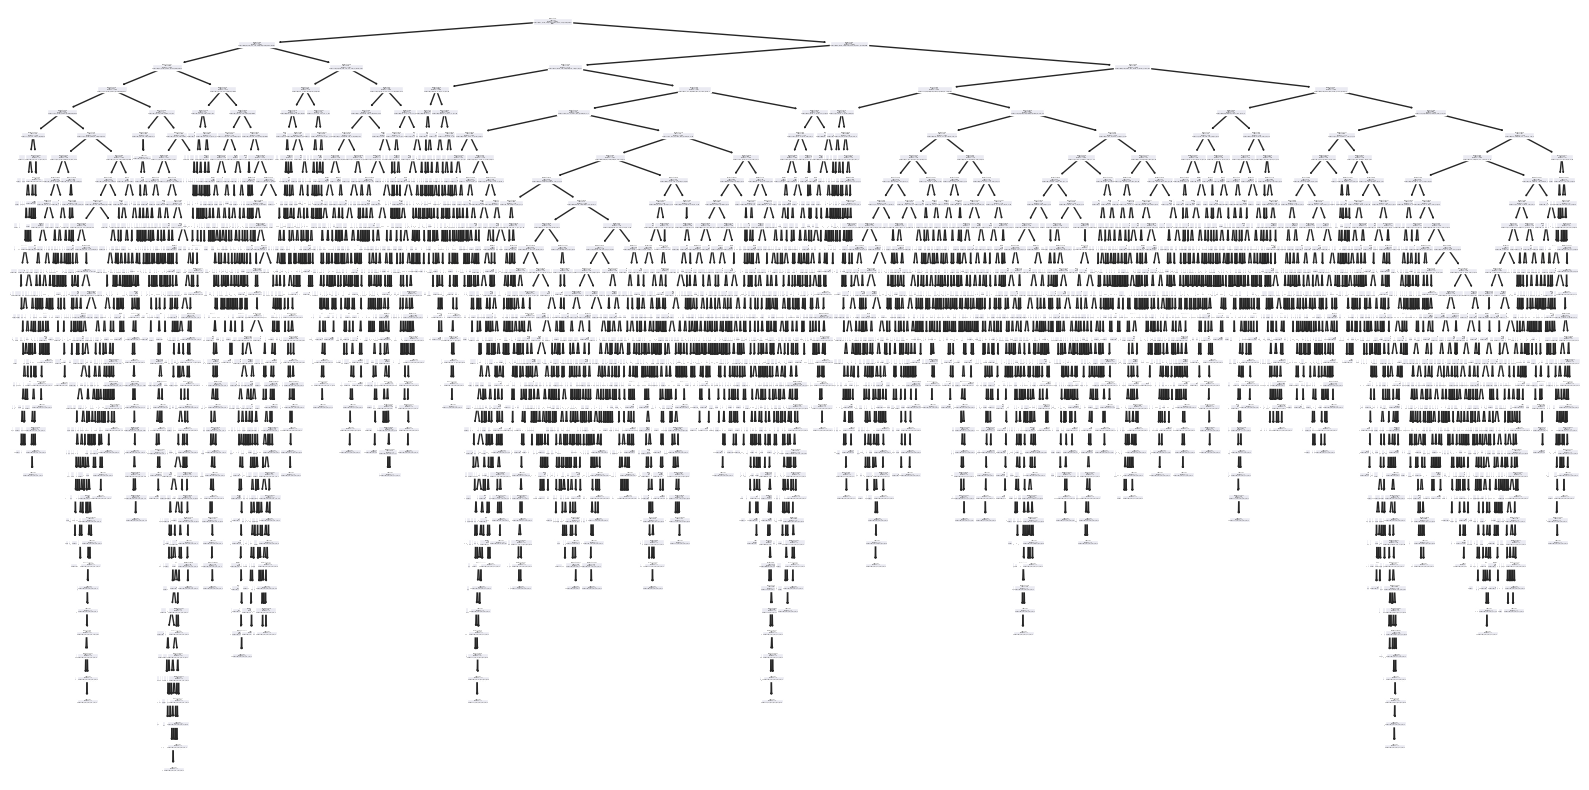

In [47]:
from helpers import plot_decision_tree
plot_decision_tree(tree=forest.estimators_[0])

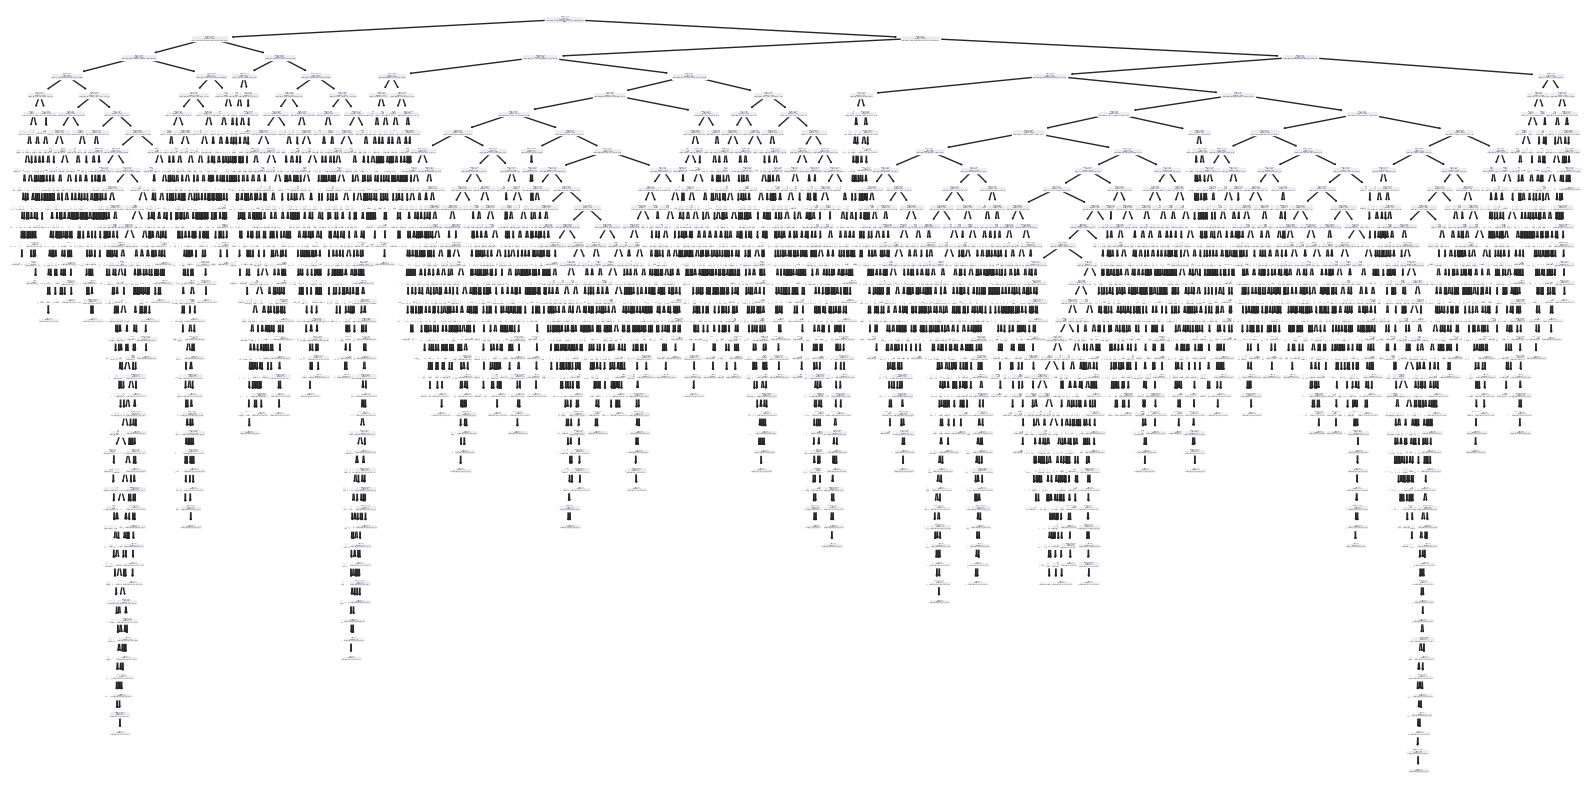

In [48]:
plot_decision_tree(tree=forest.estimators_[99])

In [ ]:
importances = forest.feature_importances_
importances

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

# Initialize the XGBoost Classifier
xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=10)

# Train the XGBoost model
xg_clf.fit(x_train, y_train)

predictions = xg_clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9014166666666666
